### Prepare Config

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

### Load Dataset

In [13]:
# Load dataset
# Adjust file path as needed
chunk_iter = pd.read_csv('../data/fraud_mock.csv', chunksize=100000)
df = pd.concat(chunk_iter)

print("Shape of dataset:", df.shape)
df.head()

df.info()
df.describe()

# Missing values
df.isnull().sum()

# Memory usage (important for large datasets)
df.memory_usage(deep=True) / 1024**2

Shape of dataset: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time_ind          int64  
 1   transac_type      object 
 2   amount            float64
 3   src_acc           object 
 4   src_bal           float64
 5   src_new_bal       float64
 6   dst_acc           object 
 7   dst_bal           float64
 8   dst_new_bal       float64
 9   is_fraud          int64  
 10  is_flagged_fraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Index                 0.000126
time_ind             48.542938
transac_type        390.906549
amount               48.542938
src_acc             405.804475
src_bal              48.542938
src_new_bal          48.542938
dst_acc             405.806003
dst_bal              48.542938
dst_new_bal          48.542938
is_fraud             48.542938
is_flagged_fraud     48.542938
dtype: float64

### Target Variable Analysis

is_fraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


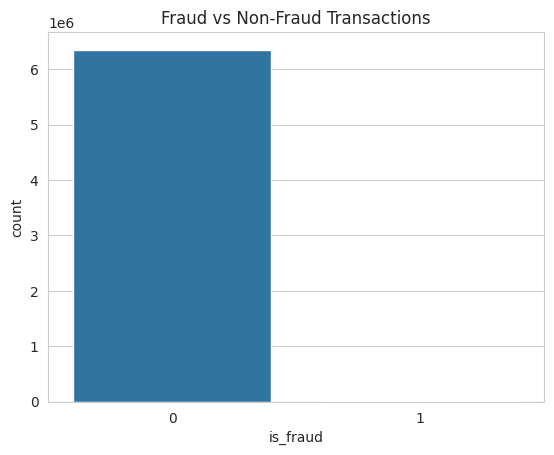

In [14]:
# Class balance
fraud_counts = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_counts)

sns.countplot(data=df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

### Transaction Type Analysis

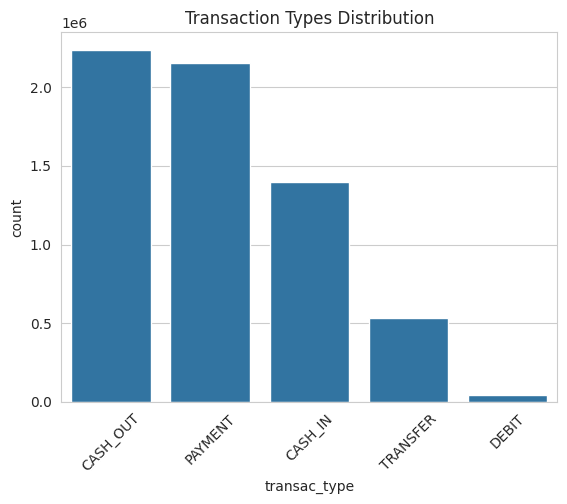

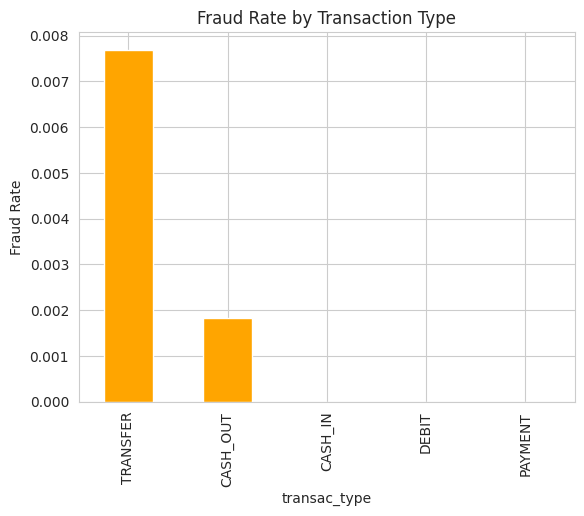

In [15]:
# Distribution of transaction types
sns.countplot(data=df, x='transac_type', order=df['transac_type'].value_counts().index)
plt.title('Transaction Types Distribution')
plt.xticks(rotation=45)
plt.show()

# Fraud rate by transaction type
fraud_rate_by_type = df.groupby('transac_type')['is_fraud'].mean().sort_values(ascending=False)
fraud_rate_by_type.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

### Amount Analysis

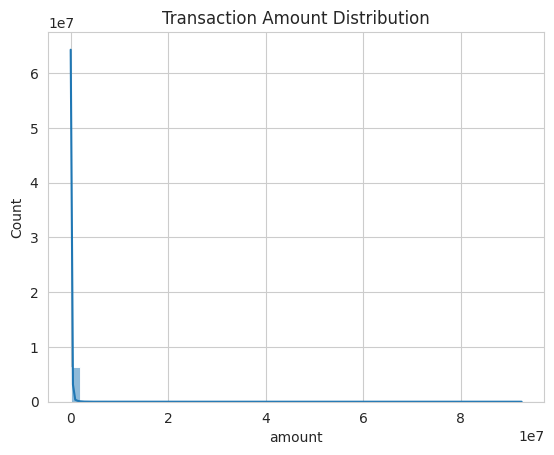

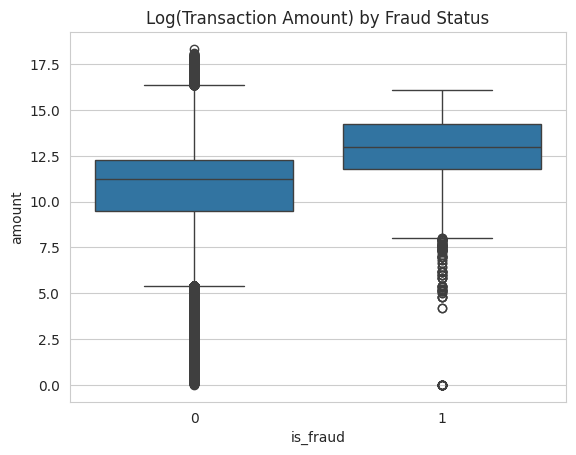

In [16]:
# Distribution of transaction amounts
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Amount distribution by fraud status (log scale)
sns.boxplot(data=df, x='is_fraud', y=np.log1p(df['amount']))
plt.title('Log(Transaction Amount) by Fraud Status')
plt.show()


### Time-based Analysis

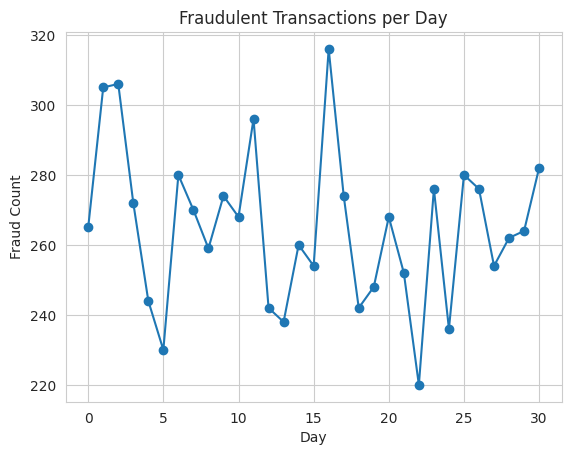

In [17]:
# Convert time_ind to day/hour
df['day'] = df['time_ind'] // 24
df['hour'] = df['time_ind'] % 24

# Fraud count over time
fraud_over_time = df.groupby('day')['is_fraud'].sum()
fraud_over_time.plot(kind='line', marker='o')
plt.title('Fraudulent Transactions per Day')
plt.xlabel('Day')
plt.ylabel('Fraud Count')
plt.show()

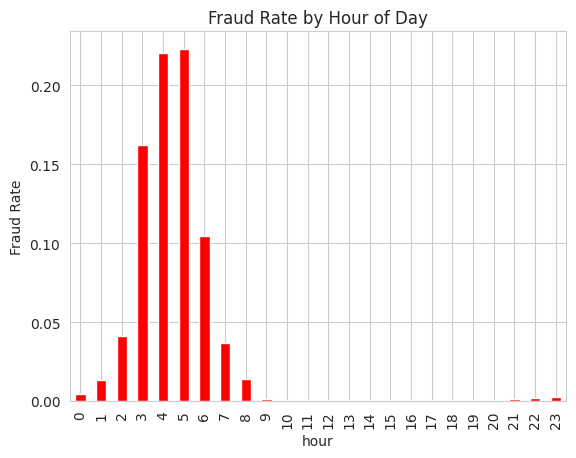

In [18]:
# Fraud rate by hour of day
fraud_by_hour = df.groupby('hour')['is_fraud'].mean()
fraud_by_hour.plot(kind='bar', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.ylabel('Fraud Rate')
plt.show()

### Account Balance Analysis

Transactions with negative sender balance: 0


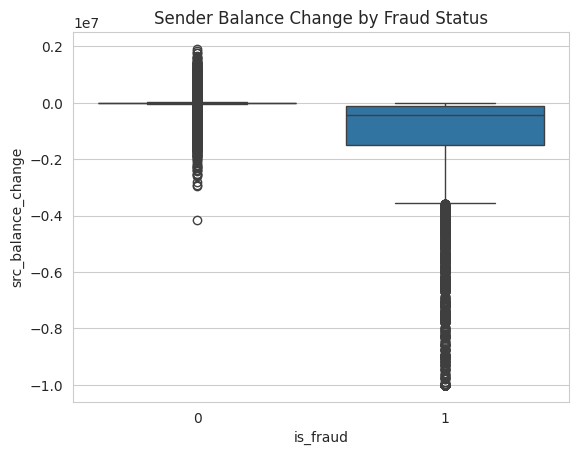

In [19]:
# Check for negative balances after transaction
neg_balances = (df['src_new_bal'] < 0).sum()
print(f"Transactions with negative sender balance: {neg_balances}")

# Balance changes
df['src_balance_change'] = df['src_new_bal'] - df['src_bal']
df['dst_balance_change'] = df['dst_new_bal'] - df['dst_bal']

# Boxplot of sender balance change by fraud status
sns.boxplot(data=df, x='is_fraud', y='src_balance_change')
plt.title('Sender Balance Change by Fraud Status')
plt.show()


8. FLAGGED FRAUD ANALYSIS

is_fraud                0     1
is_flagged_fraud               
0                 6354407  8197
1                       0    16


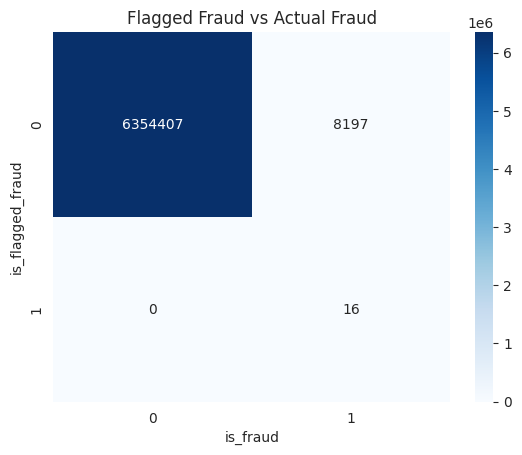

In [20]:
# How many flagged transactions are actually fraud?
flagged_fraud_ct = pd.crosstab(df['is_flagged_fraud'], df['is_fraud'])
print(flagged_fraud_ct)

sns.heatmap(flagged_fraud_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Flagged Fraud vs Actual Fraud')
plt.show()


9. CORRELATION & MULTICOLLINEARITY CHECK

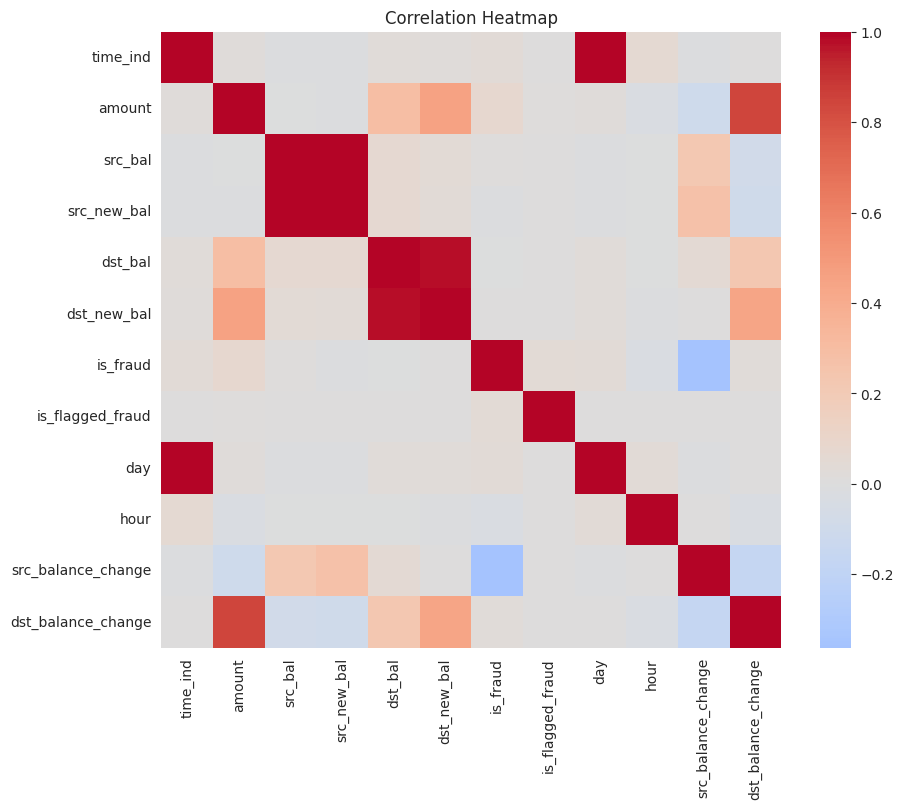

In [21]:
# Select numeric columns for correlation
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


10. DUPLICATE & DATA QUALITY CHECKS

In [22]:
# Check duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# Check if src_acc == dst_acc
same_account = (df['src_acc'] == df['dst_acc']).sum()
print(f"Transactions with same sender and recipient: {same_account}")


Duplicate rows: 0
Transactions with same sender and recipient: 0
